# Regularized Linear Regresssion Model - Built from Scratch

### DataSet Used : [Vehicle DataSet from Kaggle](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)  - Car data.csv

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

### Basic Data Analysis and Exploration

In [57]:
df1 = pd.read_csv('car data.csv')
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [58]:
df1.shape

(301, 9)

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [60]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [61]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [62]:
df1['Age'] = dt.datetime.now().year - df1['Year']
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [63]:
df2 = df1.drop('Year', axis='columns')
df2.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [64]:
df3 = df2.rename(columns = {'Selling_Price' : 'Selling_Price(lacs)', 
                          'Present_Price' : 'Present_Price(lacs)',
                          'Owner' : 'Past Owners'})
df3.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past Owners,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


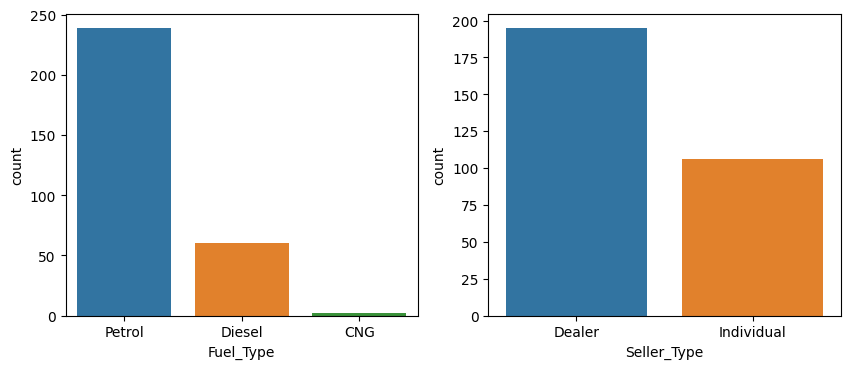

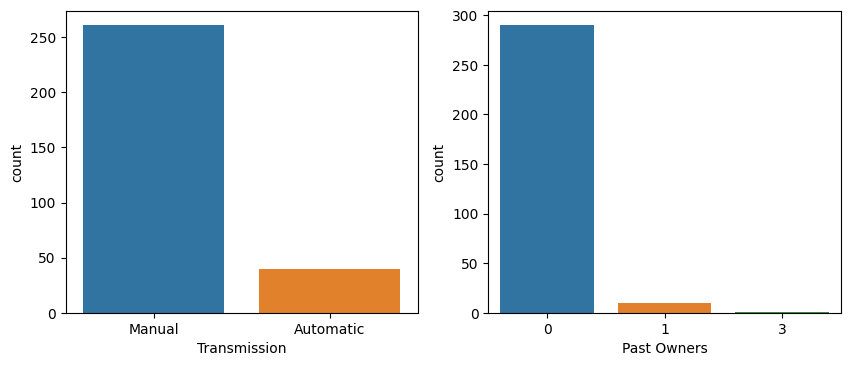

In [65]:
list_of_columns = ['Fuel_Type','Seller_Type','Transmission','Past Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4],dpi=100)
   
 
    plt.subplot(1,2,1)
    sns.countplot(x=list_of_columns[i], data=df3)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=list_of_columns[i], data=df3)
    i += 1
    
    plt.show()

In [66]:
len(df3.Car_Name.unique())

98

In [67]:
df4 = df3.drop('Car_Name', axis='columns')
df4.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [68]:
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


### Data Splitting and Creating Dummy variables (aka One hot encoding)

In [69]:
df6 = df5.drop('Selling_Price(lacs)', axis='columns').sample(frac=0.8, axis=0)
df6_y = df5['Selling_Price(lacs)'][df6.index]
df6.head()

,Present_Price(lacs),Kms_Driven,Past Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
64,36.23,6000,0,4,1,0,0,0
65,6.95,45000,0,7,1,0,0,1
10,3.60,2135,0,4,0,1,0,1
38,3.76,10079,0,5,0,1,0,1
221,6.79,32000,0,8,0,1,0,0


In [70]:
df6_y.head()

64     33.00
65      4.75
10      2.85
38      3.00
221     4.50
Name: Selling_Price(lacs), dtype: float64

In [71]:
X_test = df5.drop(df6.index).drop('Selling_Price(lacs)', axis='columns')
X_test.head()

,Present_Price(lacs),Kms_Driven,Past Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
3,4.15,5200,0,10,0,1,0,1
16,10.79,41678,0,6,1,0,0,1
20,3.95,25000,0,5,0,1,0,1
22,8.01,50000,0,10,0,1,0,0
37,2.28,127000,0,18,0,1,1,1


In [72]:
Y_test = df5.iloc[X_test.index]['Selling_Price(lacs)']
Y_test.head()

3     2.85
16    7.25
20    2.85
22    4.40
37    0.35
Name: Selling_Price(lacs), dtype: float64

In [73]:
X_test.shape

(60, 8)

In [74]:
X_train = df6.sample(frac=0.8,axis=0)
Y_train = df6_y[X_train.index]
X_train.head()

,Present_Price(lacs),Kms_Driven,Past Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
84,13.460,197176,0,16,1,0,0,1
28,3.950,44542,0,11,0,1,0,1
116,1.470,33000,0,8,0,1,1,1
288,13.600,34000,0,6,0,1,0,1
194,0.787,50000,0,13,0,1,1,1


In [75]:
X_train.shape

(193, 8)

In [76]:
X_dev = df6.drop(X_train.index)
Y_dev = df6_y[X_dev.index]
X_dev.head()

,Present_Price(lacs),Kms_Driven,Past Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
227,4.43,57000,0,10,0,1,0,1
229,6.79,52132,0,9,1,0,0,1
145,0.81,19000,0,9,0,1,1,1
101,1.82,1400,0,4,0,1,1,1
34,8.06,45000,0,7,1,0,0,1


In [77]:
X_dev.shape

(48, 8)

## Model Building - From Scratch

#### Adding intercept term (aka bias term)

In [78]:
X_train['intercept'] =  np.ones(X_train.shape[0])
X_train_i = X_train.reindex(columns= (['intercept'] + X_train.columns.to_list()[:-1]))
X_train_i.head()

,intercept,Present_Price(lacs),Kms_Driven,Past Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
84,1.0,13.460,197176,0,16,1,0,0,1
28,1.0,3.950,44542,0,11,0,1,0,1
116,1.0,1.470,33000,0,8,0,1,1,1
288,1.0,13.600,34000,0,6,0,1,0,1
194,1.0,0.787,50000,0,13,0,1,1,1


In [79]:
X_train_i_d = pd.get_dummies(X_train_i, drop_first=True)

In [80]:
X_train_i_d.head()

,intercept,Present_Price(lacs),Kms_Driven,Past Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
84,1.0,13.460,197176,0,16,1,0,0,1
28,1.0,3.950,44542,0,11,0,1,0,1
116,1.0,1.470,33000,0,8,0,1,1,1
288,1.0,13.600,34000,0,6,0,1,0,1
194,1.0,0.787,50000,0,13,0,1,1,1


##### Cost Function for Regularized Linear Regression
$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$


In [81]:
def compute_cost(X,Y,theta,lambda_=0.0):
    
    m = Y.shape[0]
    J = 0
    h = np.dot(X,theta)
    J = np.sum(np.square(h-Y))/(2*m) + (lambda_/(2*m)) * np.sum(np.square(theta[1:]))
    
    return J

In [82]:
compute_cost(X_train_i_d,Y_train,np.zeros(X_train.shape[1]))

26.932821243523314

#### Normalizing and Scaling the Data

In [83]:
def feature_Normalize(X , list_of_features):
    
    X_norm = X.copy()
    mu_dict = {}
    std_dict = {}
    
    for i in list_of_features : 
        mu = np.mean(X_norm[i])
        std = np.std(X_norm[i])
        X_norm[i] = (X_norm[i] - mu)/std
        mu_dict[i] = mu
        std_dict[i] = std
    
    return X_norm, mu_dict, std_dict

In [84]:
X_train_norm,l_mu,l_std = feature_Normalize(X_train_i_d,['Present_Price(lacs)','Kms_Driven','Age'])
X_train_norm.head()

,intercept,Present_Price(lacs),Kms_Driven,Past Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
84,1.0,0.609590,3.804244,0,2.939596,1,0,0,1
28,1.0,-0.417298,0.194400,0,1.230734,0,1,0,1
116,1.0,-0.685088,-0.078572,0,0.205418,0,1,1,1
288,1.0,0.624707,-0.054922,0,-0.478127,0,1,0,1
194,1.0,-0.758838,0.323483,0,1.914279,0,1,1,1


#### Gradient of the above Cost Function
$$
\begin{align}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} & \qquad \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \qquad \text{for } j \ge 1
\end{align}
$$


In [85]:
def gradient_descent(X,Y,theta,alpha,num_iters,lambda_):
    
    m = Y.shape[0]
    theta = theta.copy()
    J_history = []
    grad = np.zeros(theta.shape)
    
    for i in range(num_iters):
        
        grad = (alpha/m) * ( (np.dot(X,theta) - Y).dot(X) )
        theta[0] = theta[0] - grad[0]
        theta[1:] = theta[1:] - grad[1:] + (lambda_/m) * theta[1:]
        
        J_history.append(compute_cost(X,Y,theta))
        
    return theta, J_history

In [86]:
theta,cost = gradient_descent(X_train_norm,Y_train,np.zeros(X_train.shape[1]),0.5,100,1)

cost[-1]

1.6794489584660488

Text(0, 0.5, 'Cost function')

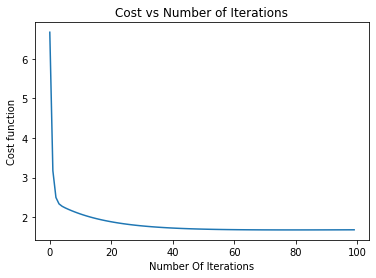

In [87]:
plt.figure()
plt.title('Cost vs Number of Iterations')
plt.plot(list(range(100)), cost)
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost function')

In [88]:
mean = np.mean(X_train_norm,axis=1)
mean.shape

(193,)

#### $R^2  Score$ 
$$R^2  = 1  - \frac{\sum (Y -\hat Y)^2}{\sum(Y - \mu)^2}  $$

In [89]:
def calculate_r2_score(Y_actual,Y_pred,mean):
    
    return 1 - (np.sum(np.square(Y_actual - Y_pred))/(np.sum(np.square(Y_actual - mean))))

In [90]:
calculate_r2_score(Y_train,np.dot(X_train_norm,theta),mean)

0.9331766209322196

Text(0, 0.5, 'Y_train_predicted')

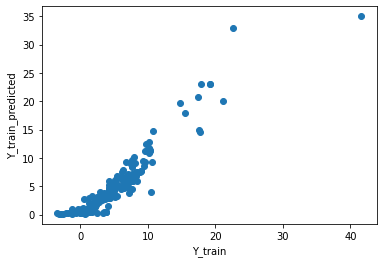

In [91]:
plt.figure()
plt.scatter(np.dot(X_train_norm,theta), Y_train)
plt.xlabel('Y_train')
plt.ylabel('Y_train_predicted')

### Combined all the functions and Created a Class for the Model

#### Please click [here](My_Linear_Regression_model.py) to see the Class (Code for the Model)

In [92]:
from My_Linear_Regression_model import My_Linear_Regression

In [93]:
model = My_Linear_Regression()
model.fit(X_train,Y_train,normalize=True)

In [94]:
model.cost[-1]

1.896299977675056

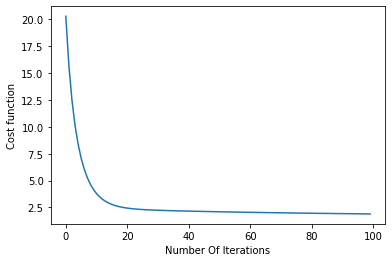

In [95]:
model.plot_cost()

In [96]:
model.train_r2_score

0.9245483635595911

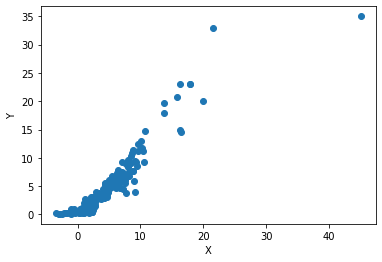

In [97]:
model.plot_graph_for_r2()

#### Using Model on  Dev Set (aka Cross Validation set)

In [98]:
Y_dev_pred = model.predict(X_dev)
model.get_cost(Y_dev_pred,Y_dev)

1.968059927371879

In [99]:
model.calculate_r2_score(Y_dev_pred, Y_dev, np.mean(X_dev,axis=1))

0.9999999118312768

#### Hyperparameter Tuning for Lambda ($\lambda$)

In [100]:
Model_Selection = pd.DataFrame(columns=['Model','lambda','r2_train','r2_dev',
                                        'Cost_Train', 'Cost_Dev'])

i=1
for lambda_i in np.arange(0,2.2,0.2):
    
    
    
    model = My_Linear_Regression()
    model.fit(X_train,Y_train,normalize=True,lambda_=lambda_i)
    r2_dev_score = model.calculate_r2_score(Y_dev_pred, Y_dev, np.mean(X_dev,axis=1))
    Y_pred_dev = model.predict(X_dev)
   
    Model_Selection = Model_Selection.append({'Model': 'Model ' + str(i),
                                             'lambda': lambda_i,
                                             'r2_train' : model.train_r2_score ,
                                             'r2_dev' : r2_dev_score,
                                             'Cost_Train' : model.cost[-1],
                                             'Cost_Dev' : model.get_cost(Y_pred_dev, Y_dev)}, 
                                              ignore_index=True)
    i+=1

In [101]:
Model_Selection

,Model,lambda,r2_train,r2_dev,Cost_Train,Cost_Dev
0,Model 1,0.0,0.924548,1.0,1.896300,1.968060
1,Model 2,0.2,0.924409,1.0,1.915933,2.033427
2,Model 3,0.4,0.924164,1.0,1.939654,2.103060
3,Model 4,0.6,0.923806,1.0,1.967890,2.177267
4,Model 5,0.8,0.923324,1.0,2.001126,2.256386
5,Model 6,1.0,0.922709,1.0,2.039918,2.340787
6,Model 7,1.2,0.921948,1.0,2.084904,2.430880
7,Model 8,1.4,0.921028,1.0,2.136817,2.527112
8,Model 9,1.6,0.919934,1.0,2.196500,2.629982
9,Model 10,1.8,0.918648,1.0,2.264928,2.740037


We can see that $\lambda$ = 0 gives us best results

#### Using our Best Model on Test Set

In [102]:
final_model = My_Linear_Regression()
final_model.fit(X_train,Y_train,normalize=True)
Y_test_pred = final_model.predict(X_test)
final_model.get_cost(Y_test_pred,Y_test)

1.570101074028271

In [103]:
final_model.calculate_r2_score(Y_test_pred,Y_test, np.mean(X_test,axis=1))

0.9999999054571167

### Normal Equation : Alternative to Gradient Descent for Convex Functions 

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

There is no need of feature scaling for this approach. Just we have to add intercept term.


In [104]:
X_train_i.head()

,intercept,Present_Price(lacs),Kms_Driven,Past Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
84,1.0,13.460,197176,0,16,1,0,0,1
28,1.0,3.950,44542,0,11,0,1,0,1
116,1.0,1.470,33000,0,8,0,1,1,1
288,1.0,13.600,34000,0,6,0,1,0,1
194,1.0,0.787,50000,0,13,0,1,1,1


In [105]:
X = X_train_i.copy()
Y = Y_train.copy()

In [106]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [107]:
m = Y.shape[0]
h = np.dot(X,theta)
train_cost = np.sum(np.square(h-Y))/(2*m)
train_cost

1.663786521845941

In [108]:
X_dev['intercept'] =  np.ones(X_dev.shape[0])
X_dev_i = X_dev.reindex(columns= (['intercept'] + X_dev.columns.to_list()[:-1]))
X_test['intercept'] =  np.ones(X_test.shape[0])
X_test_i = X_test.reindex(columns= (['intercept'] + X_test.columns.to_list()[:-1]))

In [109]:
m = Y_dev.shape[0]
h = np.dot(X_dev_i,theta)
dev_cost = np.sum(np.square(h-Y_dev))/(2*m)
dev_cost

1.2873115290740211

In [110]:
m = Y_test.shape[0]
h = np.dot(X_test_i,theta)
test_cost = np.sum(np.square(h-Y_test))/(2*m)
test_cost

1.6939774051449124